In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import display, Image
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 11,9

Populating the interactive namespace from numpy and matplotlib


In [19]:
hr = pd.read_csv('HR.csv')

In [36]:
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [31]:
def set_sal(x):
    if x == 'high':
        return 1
    elif x == 'medium':
        return 0
    else:
        return -1

In [32]:
hr['salary'] = hr['salary'].apply(set_sal)

In [33]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,-1
1,0.80,0.86,5,262,6,0,1,0,sales,0
2,0.11,0.88,7,272,4,0,1,0,sales,0
3,0.72,0.87,5,223,5,0,1,0,sales,-1
4,0.37,0.52,2,159,3,0,1,0,sales,-1


In [34]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [35]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,-0.405294
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
salary                     0.00
dtype: float64

In [38]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,-1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Можно видеть, что в компании не очень большой уровень удовлетворенности работой, однако за последнее оценивание он немного повысился.
Невысокий уровень оценки работы можно объяснить высокой нагрузкой на работе. Среднее время работы в день - 10 часов,среднее количество проектов на человека 3.Людей могут отпугивать высокие нагрузки.
Можем видеть, что люди примерно дорабатывают до 4 лет в компании (75% людей проработали 4 и меньше года в компании), а потом многие из них уходят (опять же, исходя из того, что большинство сотрудников имеют меньше 4 лет опыта работы в компании).  При этом, срднее время в компании - 3 года, то есть 3-4 года - это некоторый рубеж, после которого много сотрудников уходят.  То есть, сотрудники не убегают в первый же год, а дорабатывают до приличного срока в компании, а потом уходят. Значит возможно, причины ухода надо искать более глобальные, связанные с долгосрочными перспективами. Опять же, одной из такие причин может являться чрезмерная  нагрузка, которую упоминали выше, люди просто не могут так сильно работать в течение долгого периода.
Еще одной из причин, почему люди, проработавшие достаточно большое количество времени в компании, уходят, может являться низкое количество повышений - их практически нет.
Ну и конечно же, главная причина низких оценок - маленькая зп. Большинство сотрудников получают зп, помеченную категорие low: 75% сотрудников получают low зп. Это очень плохой показатель.

Посмотрим на эти показатели в разрезе департаментов.

In [54]:
sales_lst = hr.sales.value_counts().reset_index()['index'].tolist()
sales_lst

['sales',
 'technical',
 'support',
 'IT',
 'product_mng',
 'marketing',
 'RandD',
 'accounting',
 'hr',
 'management']

In [88]:
for dep in sales_lst:
    print(dep)
    print("Department of company: %s" % dep)
    print("Total employee count in this department: %d \n" % hr[hr['sales']==dep].shape[0])
    print("Total employee left in this department: %d \n"% hr[(hr['sales']==dep) & (hr['left'] == 1)].shape[0])
    print(hr[hr['sales']==dep].describe())

sales
Department of company: sales
Total employee count in this department: 4140 

Total employee left in this department: 1014 

       satisfaction_level  last_evaluation  number_project  \
count         4140.000000      4140.000000     4140.000000   
mean             0.614447         0.709717        3.776329   
std              0.250251         0.171459        1.242798   
min              0.090000         0.360000        2.000000   
25%              0.430000         0.550000        3.000000   
50%              0.640000         0.700000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident         left  \
count           4140.000000         4140.000000    4140.000000  4140.000000   
mean             200.911353            3.534058       0.141787     0.244928   
std               49.560393            1.512307       0.348874     0.43009

       satisfaction_level  last_evaluation  number_project  \
count          767.000000       767.000000      767.000000   
mean             0.582151         0.717718        3.825293   
std              0.255235         0.171904        1.261288   
min              0.090000         0.360000        2.000000   
25%              0.400000         0.560000        3.000000   
50%              0.610000         0.730000        4.000000   
75%              0.800000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident        left  \
count            767.000000          767.000000     767.000000  767.000000   
mean             201.162973            3.522816       0.125163    0.265971   
std               51.108274            1.404650       0.331120    0.442137   
min               97.000000            2.000000       0.000000    0.000000   
25%              153.500000            3.000000    

Можем видеть, что выше среднего satisfaction_level у management, ниже среднего (61%) у hr, accounting и technical.
Меньше всего уходят management, больше всего accounting(26%, работают выше среднего, имеют низкий уровень оценки работы), hr(29%, при этом они меньше остальных работают и имеют меньше срденего уровень оценки работы), support(имеют ниже срденего зп,при этом работают на равне со средним по департаментам, повышение ниже среднего), technical - примерно такая же ситуация, как и в support. Можно заметить, что в отделах с самыми плохими условиями и низкой оценкой, текучка выше - больше людей с меньшим стажем работы в компании.
Можем видеть, что больше всего сотрудников работается в sales.
Больше всего работников, причем с большим отрывом, ушло в sales.

## Рассчитать и визуализировать корреляционную матрицу для переменных

In [25]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


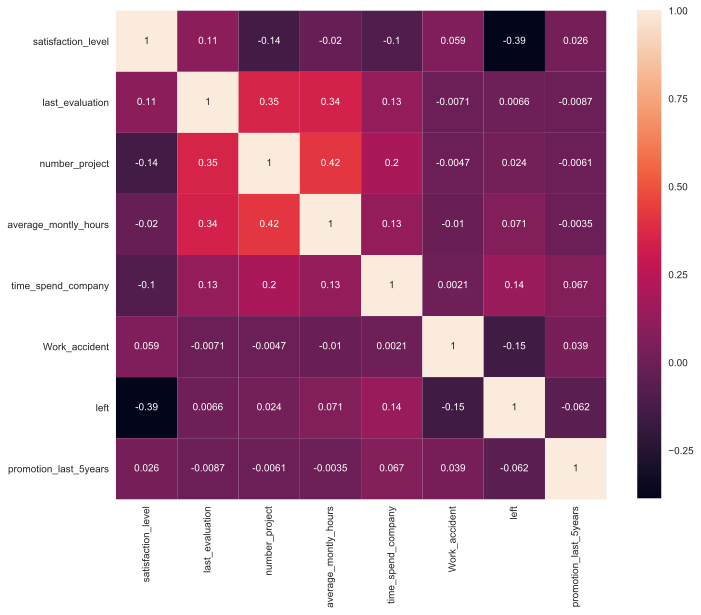

In [26]:

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);


Можно видеть, что индикатор left достаточно сильно негативно коррелирует с уровнем удовлетворенности работой, что вполне объяснимл. Также выше остальных left положительно коррелирует с стажем в компании. То есть, возможно, есть некая зависимость, что сотредники, которые дольше работают в компании, менее вероятнее уйдут. Сильно положительно коррелируют количество рабочих часов в месяце и количество проектов. Интересна зависимость количества рабочих часов в месяц и уровень последней оценки работы.Можно предположить, что чем выше оценка, тем больше человек проводит времени на работе, то есть, можно предположить, что больше работают те, кому работа их работа нравится.

## Показать распределение сотрудников по зарплатам

In [27]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

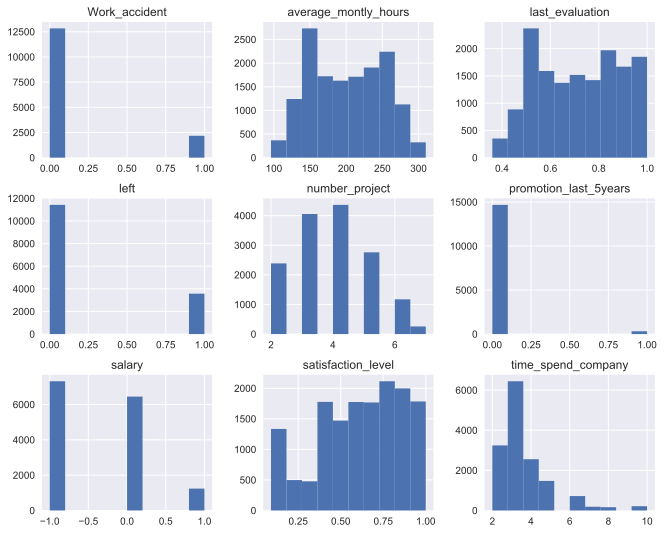

In [62]:
hr.hist();

Можем видеть, что зп в основном низкие.
Также по графикам ясно видим, что много сотрудников уходит. Пожтверждается наша гипотеза о том, что многие дорабатывают до 3-4 лет и уходят. Можем увидеть, что последняя оценка скорее отрицательная - много низких оценок.
Интересная картина у satisfaction_level. Существует достаточное количество очень негативных оценок.

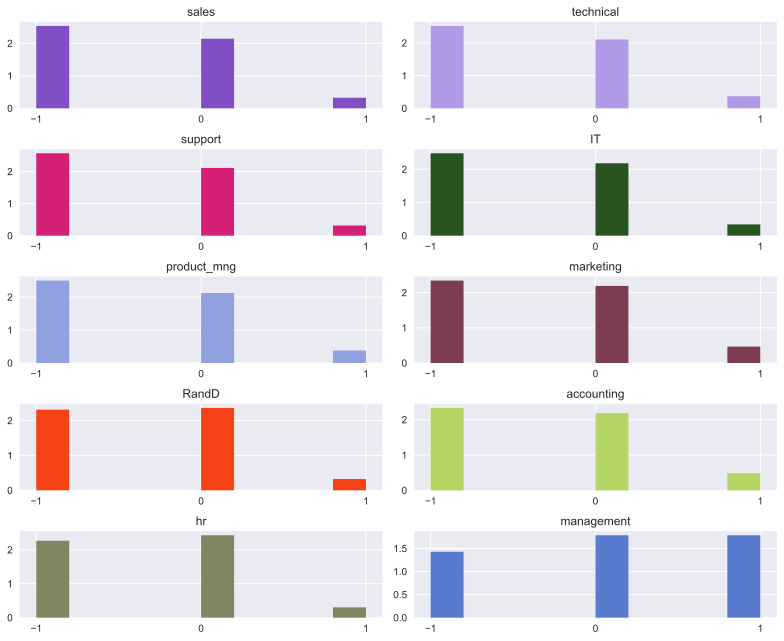

In [81]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['salary'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    ax.set_xticks([-1,0,1])
plt.tight_layout()

Как уже отмечалось выше, больше всего зп у management. Хуже всего платят support, accounting, technical, product_mng, sales.

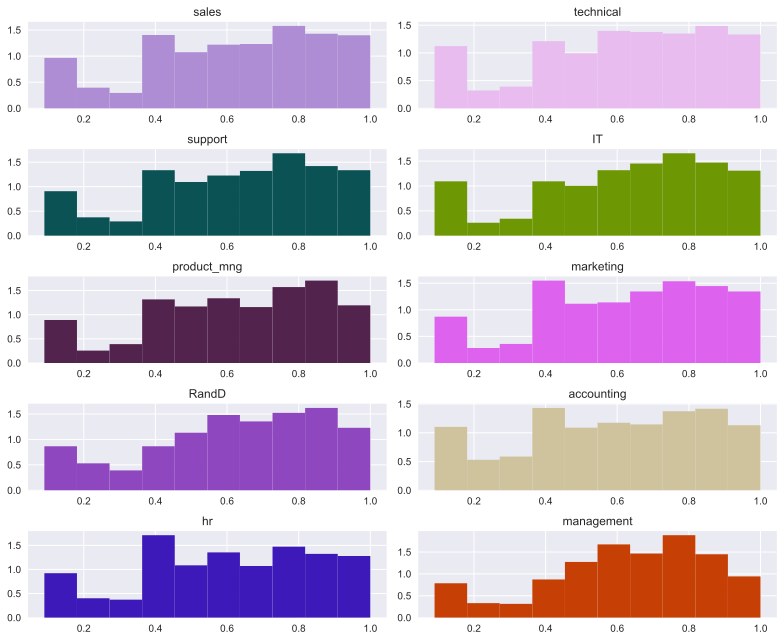

In [83]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['satisfaction_level'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    
plt.tight_layout()

Можем виеть, что marketing accounting и hr больше всех имеют низкий уровень удовлетворенности - много оценок 0.4. Больше всего оценок 0.4 у hr.ь
Во всех департаментах можем видеть, что  самые низкие оценки формируют еще одну группу часто встречающихся оценок. Это может говорить, что во всех департаментах присутсвует весомая доля достаточно сильно недовльных сотрудников.

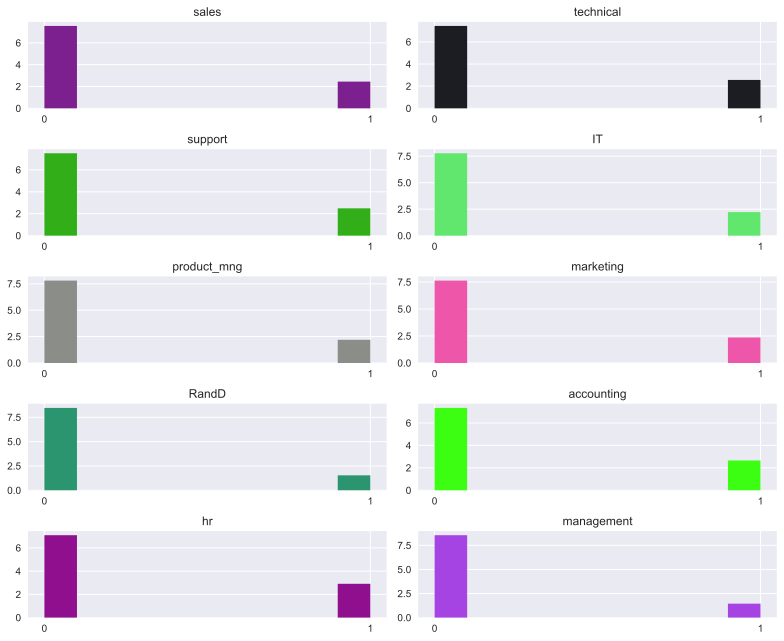

In [90]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['left'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    ax.set_xticks([0,1])
    
plt.tight_layout()

Выше всего доля ушедших по отношению к оставшимся в hr, accounting.

In [93]:
print('Total left in company %d' %(hr[hr['left'] == 1].shape[0]))

Total left in company 3571
